In [3]:
# ## **Bloque 1: Instalación e importación de librerías**
# No se necesitan instalaciones adicionales para este script
from google.colab import drive
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import tabulate

In [1]:
!pip install tabulate

In [4]:
# ## **Bloque 2: Montar Google Drive**
drive.mount('/content/drive')
print("\n¡Drive montado correctamente! 🚀\n")

Mounted at /content/drive

¡Drive montado correctamente! 🚀



In [4]:
# ## **Bloque 3: Configuración**
class Config:
    # Extensiones de video reconocidas
    VIDEO_EXTENSIONS = {'.mp4', '.avi', '.mov', '.mkv', '.flv', '.webm',
                       '.mpg', '.mpeg', '.wmv', '.3gp', '.ogg', '.m4v'}

    # Estructura esperada
    EXPECTED_SPLITS = ['train', 'test', 'val']
    EXPECTED_CLASSES = ['violence', 'no_violence']

    # Configuración de reporte
    REPORT_FILE = 'dataset_report.txt'
    PLOT_SIZE = (12, 6)


# ## **Bloque 4: Función de validación de estructura**
def validate_structure(base_path):
    """Verifica la estructura básica del dataset"""
    missing = []
    for split in Config.EXPECTED_SPLITS:
        split_path = base_path/split
        if not split_path.exists():
            missing.append(str(split_path))
            continue
        for cls in Config.EXPECTED_CLASSES:
            if not (split_path/cls).exists():
                missing.append(str(split_path/cls))

    if missing:
        print("\n⚠️ **Advertencia:** Directorios faltantes:")
        for item in missing:
            print(f"- {item}")
        print("\nEl conteo podría ser incompleto.\n")
    else:
        print("✅ Estructura del dataset validada correctamente")


# ## **Bloque 5: Función de conteo de videos**
def count_videos(base_path, validate_files=False):
    """Cuenta los videos con barra de progreso"""
    counts = {}
    total = 0
    file_errors = []

    for split in Config.EXPECTED_SPLITS:
        split_path = base_path/split
        counts[split] = {}

        if not split_path.exists():
            continue

        for cls in Config.EXPECTED_CLASSES:
            cls_path = split_path/cls
            if not cls_path.exists():
                continue

            video_count = 0
            for file in tqdm(list(cls_path.iterdir()),
                          desc=f"{split}/{cls}",
                          unit="vid",
                          bar_format='{l_bar}{bar:20}{r_bar}{bar:-20b}'):
                if file.suffix.lower() in Config.VIDEO_EXTENSIONS:
                    if validate_files:
                        try:
                            if file.stat().st_size == 0:
                                raise Exception("Archivo vacío")
                            video_count += 1
                        except Exception as e:
                            file_errors.append({'file': str(file), 'error': str(e)})
                    else:
                        video_count += 1

            counts[split][cls] = video_count
            total += video_count

        counts[split]['total'] = sum(counts[split].values())

    return counts, total, file_errors


# ## **Bloque 6: Función de generación de reporte**
def generate_report(counts, total, file_errors, base_path):
    """Genera un reporte en formato Markdown"""
    report = []
    report.append(f"# 📊 Reporte del Dataset: `{base_path}`\n")

    # Tabla de resumen
    df = pd.DataFrame(counts).T.fillna(0)
    report.append("## Distribución de videos\n")
    report.append(df.to_markdown())

    # Totales
    report.append(f"\n\n## 📦 Total general: {total} videos\n")

    # Errores
    if file_errors:
        report.append("## ❌ Errores detectados\n")
        report.append(f"Se encontraron {len(file_errors)} archivos problemáticos\n")
        report.append("### Primeros 5 errores:\n")
        for error in file_errors[:5]:
            report.append(f"- `{error['file']}`: {error['error']}")

    return '\n'.join(str(x) for x in report)


# ## **Bloque 7: Visualización de datos**
def visualize_data(counts):
    """Muestra gráficos interactivos"""
    df = pd.DataFrame(counts).T.fillna(0)

    plt.figure(figsize=Config.PLOT_SIZE)

    # Gráfico de distribución
    plt.subplot(1, 2, 1)
    df[Config.EXPECTED_CLASSES].plot(kind='bar', stacked=True)
    plt.title('Distribución por clase')
    plt.xticks(rotation=45)

    # Gráfico de proporciones
    plt.subplot(1, 2, 2)
    df['total'].plot(kind='pie', autopct='%1.1f%%',
                     labels=df.index, startangle=90)
    plt.title('Distribución por split')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()


Ingrese la ruta de su dataset [Enter para usar '/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia']: 

📍 Ruta del dataset: /content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia

✅ Estructura del dataset validada correctamente

¿Validar integridad de los archivos? (puede ser lento) [y/N]: y


val/no_violence: 100%|████████████████████| 750/750 [00:00<00:00, 6471.17vid/s]



# 📊 Reporte del Dataset: `/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia`

## Distribución de videos

|       |   violence |   no_violence |   total |
|:------|-----------:|--------------:|--------:|
| train |       4000 |          4000 |    8000 |
| test  |        400 |           400 |     800 |
| val   |        750 |           750 |    1500 |


## 📦 Total general: 10300 videos



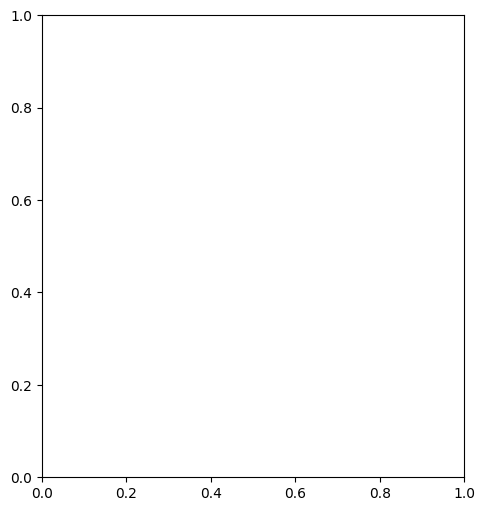

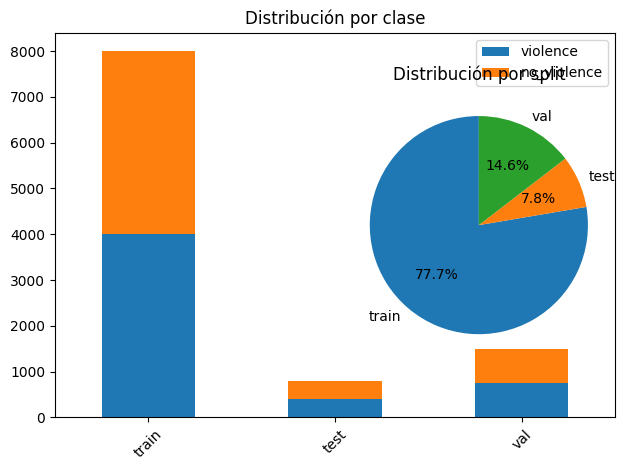


✅ Reporte guardado como: dataset_report.txt


In [5]:
# ## **Bloque 8: Ejecución principal**
# Obtener ruta del dataset
default_path = '/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia'
user_path = input(f"Ingrese la ruta de su dataset [Enter para usar '{default_path}']: ").strip()
base_path = Path(user_path) if user_path else Path(default_path)
print(f"\n📍 Ruta del dataset: {base_path}\n")

# Validar estructura
validate_structure(base_path)

# Opción de validación de archivos
validate = input("\n¿Validar integridad de los archivos? (puede ser lento) [y/N]: ").lower() == 'y'

# Conteo de videos
counts, total, errors = count_videos(base_path, validate)

# Generar y mostrar reporte
report = generate_report(counts, total, errors, base_path)
print("\n" + report)

# Visualización de datos
if total > 0:
    visualize_data(counts)
else:
    print("\nNo hay videos para visualizar 😞")

# Guardar reporte
with open(Config.REPORT_FILE, 'w') as f:
    f.write(report)
print(f"\n✅ Reporte guardado como: {Config.REPORT_FILE}")

In [5]:
!pip install ffmpeg-python

In [6]:
import os
import re
import ffmpeg
import torch
from collections import defaultdict
from tqdm import tqdm
from google.colab import drive
import subprocess

class VideoAnalyzer:
    def __init__(self, use_gpu=True):
        """
        Inicializa el analizador de videos con soporte GPU.

        Args:
            use_gpu (bool): Si se debe usar GPU cuando esté disponible
        """
        self.device = torch.device('cuda' if use_gpu and torch.cuda.is_available() else 'cpu')
        self.stats = {
            'resolution_count': defaultdict(int),
            'fps_count': defaultdict(int),
            'duration_stats': {'total': 0, 'min': float('inf'), 'max': 0},
            'total_videos': 0,
            'failed_videos': []
        }

    def get_video_info(self, file_path):
        """Obtiene información del video usando ffprobe con soporte CUDA."""
        try:
            probe = ffmpeg.probe(file_path)
            video_stream = next((stream for stream in probe['streams']
                            if stream['codec_type'] == 'video'), None)

            if video_stream:
                width = int(video_stream['width'])
                height = int(video_stream['height'])
                fps = eval(video_stream['avg_frame_rate'])
                duration = float(video_stream.get('duration', 0))
                codec = video_stream.get('codec_name', 'unknown')
                return (width, height), fps, duration, codec

        except ffmpeg.Error as e:
            print(f"\nError de FFmpeg en {os.path.basename(file_path)}: {e.stderr.decode()}")
        except Exception as e:
            print(f"\nError al procesar {os.path.basename(file_path)}: {str(e)}")

        return None, None, None, None

    def analyze_videos(self, folder_path):
        """Analiza videos con soporte GPU."""
        # Montar Google Drive si estamos en Colab
        if 'google.colab' in str(get_ipython()):
            drive.mount('/content/drive')
            folder_path = os.path.join('/content/drive/MyDrive', folder_path)

        if not os.path.isdir(folder_path):
            print(f"Error: El directorio '{folder_path}' no existe.")
            return

        print(f"\n{'='*50}")
        print(f"Dispositivo: {self.device}")
        print(f"GPU disponible: {torch.cuda.is_available()}")
        if torch.cuda.is_available():
            print(f"GPU en uso: {torch.cuda.get_device_name(0)}")
        print(f"Analizando videos en: {folder_path}")
        print(f"{'='*50}\n")

        video_files = [f for f in os.scandir(folder_path)
                    if f.is_file() and f.name.lower().endswith(
                        ('.mp4', '.avi', '.mov', '.mkv', '.webm'))]

        for entry in tqdm(video_files, desc="Procesando videos"):
            self.stats['total_videos'] += 1
            resolution, fps, duration, codec = self.get_video_info(entry.path)

            if all(v is not None for v in [resolution, fps, duration]):
                self.stats['resolution_count'][resolution] += 1
                self.stats['fps_count'][fps] += 1
                self.stats['duration_stats']['total'] += duration
                self.stats['duration_stats']['min'] = min(self.stats['duration_stats']['min'], duration)
                self.stats['duration_stats']['max'] = max(self.stats['duration_stats']['max'], duration)
            else:
                self.stats['failed_videos'].append(entry.name)

        self.print_results()

    def print_results(self):
        """Imprime resultados del análisis."""
        print(f"\n{'='*50}")
        print("RESUMEN DEL ANÁLISIS")
        print(f"{'='*50}")
        print(f"\nTotal de videos analizados: {self.stats['total_videos']}")

        if self.stats['total_videos'] > 0:
            print("\nDistribución por resolución:")
            for res, count in sorted(self.stats['resolution_count'].items(),
                                   key=lambda x: (-x[1], x[0])):
                percentage = (count / self.stats['total_videos']) * 100
                print(f"{res[0]}x{res[1]}: {count} videos ({percentage:.1f}%)")

            print("\nDistribución por FPS:")
            for fps, count in sorted(self.stats['fps_count'].items(),
                                   key=lambda x: (-x[1], x[0])):
                percentage = (count / self.stats['total_videos']) * 100
                print(f"{fps:.1f} FPS: {count} videos ({percentage:.1f}%)")

            if self.stats['duration_stats']['total'] > 0:
                print("\nEstadísticas de duración:")
                print(f"Total: {self.stats['duration_stats']['total']/60:.1f} minutos")
                print(f"Mínima: {self.stats['duration_stats']['min']:.1f} segundos")
                print(f"Máxima: {self.stats['duration_stats']['max']:.1f} segundos")
                print(f"Promedio: {(self.stats['duration_stats']['total']/self.stats['total_videos']):.1f} segundos")

            if self.stats['failed_videos']:
                print("\nVideos con errores:")
                for video in self.stats['failed_videos']:
                    print(f"- {video}")

def main():
    # Para usar en Google Colab:
    # Asegúrate de que la ruta sea relativa a tu Google Drive
    # folder_path = "/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/train/no_violence"
    folder_path = "/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/val/no_violence"
    # folder_path = "/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/test/no_violence"

    # folder_path = "/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/train/violence"
    # folder_path = "/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/val/violence"
    # folder_path = "/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/test/violence"

    analyzer = VideoAnalyzer(use_gpu=True)
    analyzer.analyze_videos(folder_path)

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dispositivo: cuda
GPU disponible: True
GPU en uso: Tesla T4
Analizando videos en: /content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/train/no_violence



Procesando videos: 100%|██████████| 4000/4000 [08:56<00:00,  7.45it/s]


RESUMEN DEL ANÁLISIS

Total de videos analizados: 4000

Distribución por resolución:
224x224: 4000 videos (100.0%)

Distribución por FPS:
15.0 FPS: 4000 videos (100.0%)

Estadísticas de duración:
Total: 327.3 minutos
Mínima: 2.6 segundos
Máxima: 7.5 segundos
Promedio: 4.9 segundos


In [7]:
!pip install torch torchvision tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os
import subprocess
import logging
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import torch

class VerificadorIntegridadVideo:
    def __init__(self, directorio_entrada, directorio_salida, archivo_log="integridad_video.log", usar_gpu=True):
        """
        Inicializa el verificador de integridad de videos con soporte GPU.
        """
        # Configurar directorios
        self.directorio_entrada = Path(directorio_entrada)
        self.directorio_salida = Path(directorio_salida)
        self.directorio_salida.mkdir(parents=True, exist_ok=True)

        # Configuración GPU
        self.device = torch.device('cuda' if usar_gpu and torch.cuda.is_available() else 'cpu')

        # Configurar logging
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s',
            handlers=[
                logging.FileHandler(archivo_log),
                logging.StreamHandler()
            ]
        )
        self.logger = logging.getLogger("VerificadorVideo")

        # Mostrar información del dispositivo
        self.logger.info(f"Dispositivo: {self.device}")
        if torch.cuda.is_available():
            self.logger.info(f"GPU detectada: {torch.cuda.get_device_name(0)}")
            self.logger.info(f"Memoria GPU total: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

        self.estadisticas = {
            'total_videos': 0,
            'videos_corruptos': 0,
            'videos_reparados': 0,
            'reparaciones_fallidas': 0
        }

    def verificar_integridad_video(self, ruta_video):
        """Verifica si un video está corrupto usando FFmpeg."""
        try:
            resultado = subprocess.run(
                ['ffmpeg', '-v', 'error', '-i', str(ruta_video), '-f', 'null', '-'],
                stderr=subprocess.PIPE,
                text=True
            )

            if resultado.stderr:
                self.logger.warning(f"Video corrupto encontrado: {ruta_video.name}")
                return False, resultado.stderr
            return True, ""

        except Exception as e:
            self.logger.error(f"Error al verificar {ruta_video.name}: {str(e)}")
            return False, str(e)

    def reparar_video(self, ruta_video):
        """Intenta reparar un video corrupto usando GPU si está disponible."""
        try:
            ruta_salida = self.directorio_salida / f"reparado_{ruta_video.name}"

            # Configurar comando FFmpeg según disponibilidad de GPU
            if self.device.type == 'cuda':
                comando = [
                    'ffmpeg', '-i', str(ruta_video),
                    '-c:v', 'h264_nvenc',  # Codec NVIDIA
                    '-preset', 'p7',        # Mejor calidad
                    '-rc', 'vbr',          # Tasa variable
                    '-cq', '23',           # Calidad constante
                    '-c:a', 'aac',
                    str(ruta_salida)
                ]
            else:
                comando = [
                    'ffmpeg', '-i', str(ruta_video),
                    '-c:v', 'libx264',
                    '-preset', 'medium',
                    '-crf', '23',
                    '-c:a', 'aac',
                    str(ruta_salida)
                ]

            subprocess.run(comando, check=True)
            es_valido, _ = self.verificar_integridad_video(ruta_salida)

            if es_valido:
                self.estadisticas['videos_reparados'] += 1
                return True

            self.estadisticas['reparaciones_fallidas'] += 1
            return False

        except Exception as e:
            self.logger.error(f"Error al reparar {ruta_video.name}: {str(e)}")
            self.estadisticas['reparaciones_fallidas'] += 1
            return False

    def procesar_videos(self, max_workers=None):
        """Procesa videos usando múltiples workers."""
        if max_workers is None:
            max_workers = min(4, os.cpu_count() or 1)
            if self.device.type == 'cuda':
                max_workers = min(max_workers, torch.cuda.device_count() * 2)

        archivos_video = list(self.directorio_entrada.glob("**/*.[mM][pP]4"))
        self.estadisticas['total_videos'] = len(archivos_video)

        self.logger.info(f"Iniciando verificación para {len(archivos_video)} videos usando {max_workers} workers")
        videos_corruptos = []

        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = [executor.submit(self.verificar_integridad_video, video)
                      for video in archivos_video]

            for video, future in tqdm(zip(archivos_video, futures),
                                    total=len(archivos_video),
                                    desc="Verificando videos"):
                es_valido, errores = future.result()
                if not es_valido:
                    videos_corruptos.append((video, errores))
                    self.estadisticas['videos_corruptos'] += 1

        if videos_corruptos:
            self.logger.info(f"\nEncontrados {len(videos_corruptos)} videos corruptos")
            with ThreadPoolExecutor(max_workers=max_workers) as executor:
                list(tqdm(
                    executor.map(lambda x: self.reparar_video(x[0]), videos_corruptos),
                    total=len(videos_corruptos),
                    desc="Reparando videos"
                ))

        self.imprimir_estadisticas()

    def imprimir_estadisticas(self):
        """Imprime estadísticas del proceso."""
        self.logger.info("\n" + "="*50)
        self.logger.info("ESTADÍSTICAS DE PROCESAMIENTO")
        self.logger.info("="*50)
        self.logger.info(f"Total videos procesados: {self.estadisticas['total_videos']}")
        self.logger.info(f"Videos corruptos: {self.estadisticas['videos_corruptos']}")
        self.logger.info(f"Videos reparados: {self.estadisticas['videos_reparados']}")
        self.logger.info(f"Reparaciones fallidas: {self.estadisticas['reparaciones_fallidas']}")
        self.logger.info("="*50)

def main():
    # Montar Google Drive
    drive.mount('/content/drive')

    # Rutas en Google Drive
    base_dir = "/content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia"
    directorio_salida = "/content/drive/MyDrive/Proyecto IA-3/violence_school_project/procesados"

    # Lista de directorios a procesar
    directorios = [
        f"{base_dir}/train/no_violence",
        f"{base_dir}/train/violence",
        f"{base_dir}/val/no_violence",
        f"{base_dir}/val/violence",
        f"{base_dir}/test/no_violence",
        f"{base_dir}/test/violence"
    ]

    # Procesar cada directorio
    for dir_entrada in directorios:
        print(f"\nProcesando directorio: {dir_entrada}")
        verificador = VerificadorIntegridadVideo(
            directorio_entrada=dir_entrada,
            directorio_salida=directorio_salida,
            archivo_log="integridad_video.log",
            usar_gpu=True
        )
        verificador.procesar_videos()

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Procesando directorio: /content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/train/no_violence


Verificando videos: 100%|██████████| 4000/4000 [08:48<00:00,  7.57it/s]



Procesando directorio: /content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/train/violence


Verificando videos: 100%|██████████| 4000/4000 [10:28<00:00,  6.37it/s]



Procesando directorio: /content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/val/no_violence


Verificando videos: 100%|██████████| 750/750 [01:55<00:00,  6.47it/s]



Procesando directorio: /content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/val/violence


Verificando videos: 100%|██████████| 750/750 [02:05<00:00,  6.00it/s]



Procesando directorio: /content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/test/no_violence


Verificando videos: 100%|██████████| 400/400 [01:01<00:00,  6.47it/s]



Procesando directorio: /content/drive/MyDrive/Proyecto IA-3/violence_school_project/dataset_violencia/test/violence


Verificando videos: 100%|██████████| 400/400 [01:12<00:00,  5.48it/s]
